In [13]:
from google.colab import files


uploaded = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [14]:
from google.colab import files


uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


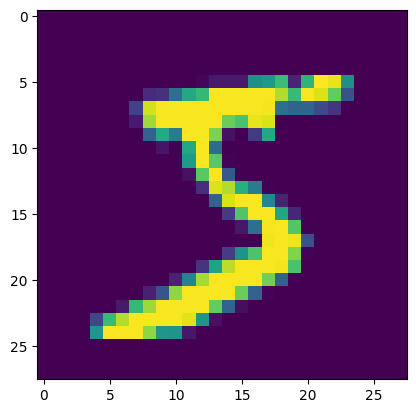

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# For training set
x_train = train_images
y_train = train_labels

# For test set
x_test = test_images
y_test = test_labels

# Verify the shapes
print(f"x_train shape: {x_train.shape}")  # Should print (60000, 28, 28)
print(f"y_train shape: {y_train.shape}")  # Should print (60000,)
print(f"x_test shape: {x_test.shape}")    # Should print (10000, 28, 28)
print(f"y_test shape: {y_test.shape}")    # Should print (10000,)
plt.imshow(x_train[0])


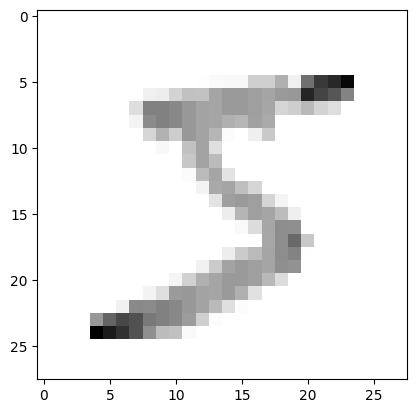

In [20]:
x_train =tf.keras.utils.normalize(x_train, axis=1)
x_test =tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [23]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimenson:",x_trainr.shape)
print("Testing samples dimenson:",x_testr.shape)

Training samples dimenson: (60000, 28, 28, 1)
Testing samples dimenson: (10000, 28, 28, 1)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [25]:
model = Sequential()
#1st convo layer
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd convo layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convo layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#1st FC layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#2nd FC layer
model.add(Dense(32))
model.add(Activation('relu'))

#last FC layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [27]:
print("total training samples:",len(x_trainr))

total training samples: 60000


In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 12s 5ms/step - loss: 0.3282 - accuracy: 0.8973 - val_loss: 0.1483 - val_accuracy: 0.9562
Epoch 2/5
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1032 - accuracy: 0.9684 - val_loss: 0.1029 - val_accuracy: 0.9674
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.0954 - val_accuracy: 0.9714
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0598 - accuracy: 0.9806 - val_loss: 0.0835 - val_accuracy: 0.9732
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0716 - val_accuracy: 0.9779


In [32]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print('Test loss on 10k samples:', test_loss)
print('Validation accuracy on 10k samples:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.9819
Test loss on 10k samples: 0.06307194381952286
Validation accuracy on 10k samples: 0.9818999767303467


In [82]:
predictions = model.predict(x_testr)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[4.9006200e-08 3.1491447e-09 3.9009919e-07 ... 9.9999881e-01
  4.2060879e-09 2.1665626e-07]
 [1.5437129e-03 2.0204856e-04 9.9820995e-01 ... 3.6104611e-06
  9.1961892e-06 7.9376309e-07]
 [1.2465190e-06 9.9999714e-01 2.0434643e-07 ... 1.9427180e-08
  2.9110727e-09 1.5944444e-07]
 ...
 [1.5604875e-11 9.3601500e-07 4.6154223e-09 ... 6.7722982e-07
  3.3918522e-07 3.1910822e-05]
 [2.6292676e-07 1.2293783e-07 2.0838591e-09 ... 3.7141522e-08
  2.4411366e-07 1.0806559e-05]
 [1.0994634e-04 1.1979598e-07 8.5195637e-07 ... 1.2207291e-09
  1.6089240e-05 5.6599409e-05]]


7


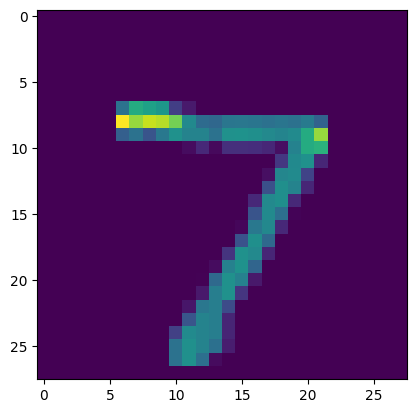

In [83]:
plt.imshow(x_test[0])
print(np.argmax(predictions[0]))

5


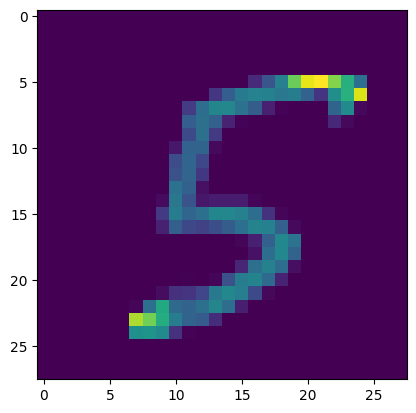

In [55]:
plt.imshow(x_test[23])
print(np.argmax(predictions[23]))

In [86]:
import cv2
img = cv2.imread("/content/eight.png")

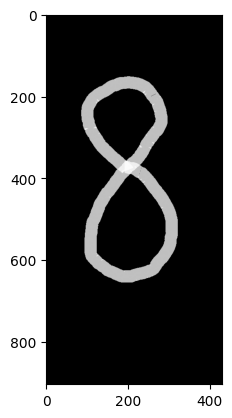

In [85]:
plt.imshow(img)

In [72]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(grey, (28, 28))
resized.shape

(28, 28)

In [73]:
finimg = tf.keras.utils.normalize(resized, axis=1)
finimg = np.array(finimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
finimg.shape

(1, 28, 28, 1)

In [87]:
prediction = model.predict(finimg)
print(np.argmax(prediction))

1/1 [==============================] - 0s 18ms/step
8
